# Pandas Tutorial
August 2022

Data stored in pandas can be accessed and edit much faster than a python list for many reasons, but one reason behind this is pandas allows vectorizing operations where you can apply a function to an entire series as a whole in 1 sweep as opposed to iterating over each element in a list and applying a function one-by-one.  Similar to pandas, numpy also increases performance and a deeper comparison of the 2 libraries can be found at [this link](https://towardsdatascience.com/speed-testing-pandas-vs-numpy-ffbf80070ee7) on towardsdatascience. The 2 main structures of pandas include a series and a dataframe. A series is 1 individual column often shorthanded as `s` while a dataframe is a set of series often shorthanded as `df`.

The pandas library is large and can be overwhelming at first to learn.  A good bookmark to use is the [pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to learn the basics.

In [23]:
import pandas as pd
import numpy as np

## Getting Started
To get started, you can create a dataframe using built-in pandas methods like `DataFrame()` and passing a dictionary with it's values as a list.

In [24]:
df = pd.DataFrame({'col1':[1,2,3], 'col2':[4,5,6], 'col3':[7,8,9]})
df

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


More commonly, you can import spreadsheets as dataframes using `read_excel()` or `read_csv()`. If you want to return the top or bottom *n* rows of your dataset, you can use `df.head(n)` or `df.tail(n)`, respectively with a default *n* = 5.

In [25]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Show the series names and the associated types.

In [26]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

One thing to note about the dtypes is that the dtype object can be strings or a mix of different types.  The date series read in as a string from a csv import, so we can cast that series to it's appropraite dtype using `s.astype()`. Alternativly, you can use `df.astype(d)` where `d` is a dictionary map of the series you wish to cast.

In [27]:
df['Date'] = df['Date'].astype('datetime64')
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

If you're only interested in the shape, you can use `df.shape` to return a tuple containing the matrix shape.

In [28]:
df.shape

(18249, 14)

Series are accessed by passing the series's name in `[]` or a list of names.

In [29]:
df['Date']

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [30]:
df[['Date', 'Total Volume', 'AveragePrice']].head()

,Date,Total Volume,AveragePrice
0,2015-12-27,64236.62,1.33
1,2015-12-20,54876.98,1.35
2,2015-12-13,118220.22,0.93
3,2015-12-06,78992.15,1.08
4,2015-11-29,51039.60,1.28


You can also pass in a boolean to access datapoints that pass a statement.

In [31]:
df[df['Date'] > '2018-01-01']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany
8480,2,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany
8481,3,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany
8482,4,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


2 useful methods to see the basic statistics for numerical series in a dataframe is by calling `df.describe()`. You can also use `df.nunique()` to see how many unique options are available in each series.

In [46]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [47]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

If you want to see statistics for a given value in the data use the `df.groupby()` followed by what type of calculation you are interested in.  You can also sort the dataframe using `df.sort_values()`. In the event of a tie, you can pass multiple series names in the `by=[]` argument and pandas will use the subsequent values as tie breakers.

In [33]:
df.groupby(by='region').mean().sort_values(by=['AveragePrice'], ascending=False)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
HartfordSpringfield,24.236686,1.818639,1.499128e+05,3.904301e+03,1.119752e+05,503.708994,3.352962e+04,3.188923e+04,1.410794e+03,229.590888,2016.147929
SanFrancisco,24.236686,1.804201,4.018645e+05,1.009967e+05,2.460150e+05,10796.791361,4.405599e+04,4.290636e+04,5.234889e+02,626.137840,2016.147929
NewYork,24.236686,1.727574,7.122311e+05,2.260156e+04,4.832954e+05,5168.053580,2.011661e+05,1.727860e+05,2.731656e+04,1063.543432,2016.147929
Philadelphia,24.236686,1.632130,2.125408e+05,1.365444e+04,1.264747e+05,1774.944053,7.063678e+04,6.336398e+04,6.958744e+03,314.058343,2016.147929
Sacramento,24.236686,1.621568,2.223779e+05,6.938285e+04,1.218252e+05,4595.151893,2.657476e+04,2.573030e+04,2.269676e+02,617.488491,2016.147929
Charlotte,24.236686,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929
Northeast,24.236686,1.601923,2.110299e+06,1.035243e+05,1.403801e+06,20167.587692,5.828059e+05,5.136774e+05,6.525460e+04,3873.868521,2016.147929
Albany,24.236686,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929
Chicago,24.236686,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929


## Data Editing

By default, pandas returns a view of the original dataframe or series. While it's possible to edit the original dataframe through a view, if you need to do some edits or calculations, it's best practice to return a copy using `df.copy()` to avoid a `SettingWithCopyWarning` - otherwise, you can run into issues later down the pipeline.

In [34]:
df_select = df[['Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'type', 'year', 'region']].copy()
df_select.head()

,Date,AveragePrice,Total Volume,Total Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany


If the names of the series need cleaning or renaming entirely, use `df.rename()` and pass a dictionary of the old and new columns in the `columns` parameter. This method also returns a view, so to keep the changes permanent, you can either define a new variable or pass `inplace=True`. One thing to note is that if the key you are trying to rename isn't present in the dataframe, pandas *won't* throw an error as seen below with the non-existent `rotten` column.

In [35]:
df_select.rename(columns={'AveragePrice':'Average Price USD', 'type':'Type', 'year':'Year', 'region':'Region', 'rotten': 'Rotten'}, inplace=True)
df_select.head()

,Date,Average Price USD,Total Volume,Total Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany


Applying a function to a series can be done using the `s.apply(f)` where `f` is a function. To make a new series, you can treat it like it the same way as editing an existing series. 

As mentioned earlier, a significant advantage pandas has over base python is vectorizing operations.  The below cells run the same operation and compares the time it takes to compute for the dataset.

In [42]:
### Non-vectorized ###
%timeit df_select['Average Price MXN'] = df_select['Average Price USD'].apply(lambda x: round(x * 20.17, 2))
df_select.head()

11.1 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


,Date,Average Price USD,Total Volume,Total Bags,Type,Year,Region,Average Price MXN,Average Price CAD
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,26.83,1.729
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,27.23,1.755
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,18.76,1.209
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,21.78,1.404
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,25.82,1.664


In [43]:
### Vectorized ###
%timeit df_select['Average Price CAD'] = round(df_select['Average Price USD'] * 1.3, 2)
df_select.head()

947 µs ± 4.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


,Date,Average Price USD,Total Volume,Total Bags,Type,Year,Region,Average Price MXN,Average Price CAD
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,26.83,1.73
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,27.23,1.76
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,18.76,1.21
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,21.78,1.40
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,25.82,1.66


Pandas also has built-in windows functions. This can be useful for calcualting the rolling average during a set number of periods for exponential smoothing.

In [67]:
df_tampa = df_select[(df_select['Region'] == 'Tampa') & (df_select['Type'] == 'organic')].sort_values(by=['Date']).reset_index(drop=True)
df_tampa.head()

,Date,Average Price USD,Total Volume,Total Bags,Type,Year,Region,Average Price MXN,Average Price CAD
0,2015-01-04,1.70,1885.48,1106.67,organic,2015,Tampa,34.29,2.21
1,2015-01-11,1.84,1258.62,400.00,organic,2015,Tampa,37.11,2.39
2,2015-01-18,1.73,1751.20,916.67,organic,2015,Tampa,34.89,2.25
3,2015-01-25,1.75,1460.04,726.67,organic,2015,Tampa,35.30,2.28
4,2015-02-01,1.68,2109.19,1326.67,organic,2015,Tampa,33.89,2.18


<AxesSubplot:>

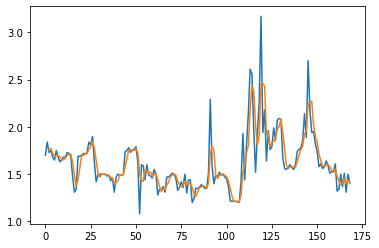

In [93]:
df_tampa['Average Price USD'].plot()
df_tampa['Average Price USD'].rolling(3).mean().plot()